In [148]:
import numpy as np
import pandas as pd
import impyute as impy
from matplotlib import pyplot as plt
import seaborn as sns

In [149]:
# Read dataset file USvideos.csv
dataset = pd.read_csv("USvideos.csv",header=0, na_values="?")

In [150]:
# Replace null values "?" by numpy.NaN
dataset.replace("?", np.NaN)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [151]:
#removin trailing spaces
dataset.columns = dataset.columns.str.strip()

In [152]:
#Check if there are duplicates. If so, remove them.
isDuplicatePresent = dataset.duplicated().any()
print(isDuplicatePresent)
dataset.shape

True


(40949, 16)

In [153]:
if (isDuplicatePresent):
    dataset = dataset.drop_duplicates()
    
dataset.shape ##48 duplicates entries were removed

(40901, 16)

In [154]:
dataset.isnull().sum()


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64

In [155]:
#Dropping description column.
del dataset['description']


In [156]:
dataset.shape

(40901, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc6ac55d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc6ac61490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc6ac55a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc6ac61b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc6ac61eb0>],
 'means': []}

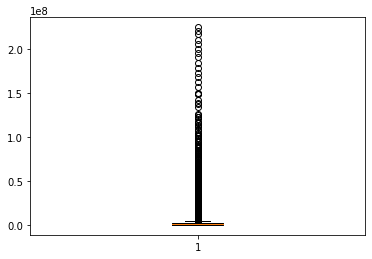

In [157]:
plt.boxplot((dataset.views))

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc6aee5f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc6aef2610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc6aee5bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc6aef2cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc6aefd070>],
 'means': []}

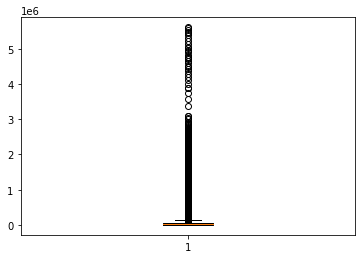

In [158]:

plt.boxplot((dataset.likes))

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc6cef65e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc6cef6ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc6cef6280>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc6cf003a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc6cf00700>],
 'means': []}

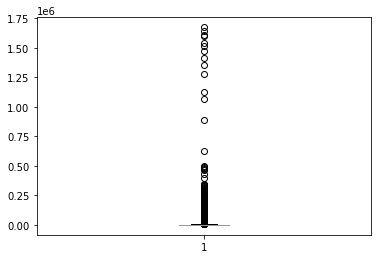

In [159]:

plt.boxplot((dataset.dislikes))

<AxesSubplot:xlabel='views'>

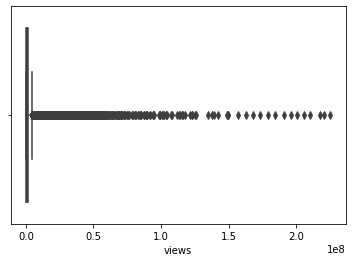

In [160]:
sns.boxplot(x=dataset['views'])

<AxesSubplot:>

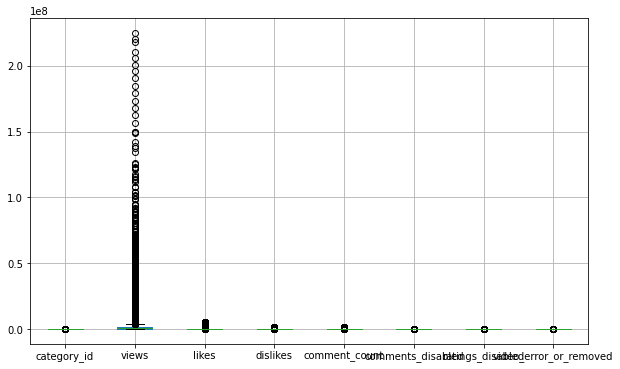

In [161]:
dataset.boxplot(figsize = (10, 6))

<AxesSubplot:>

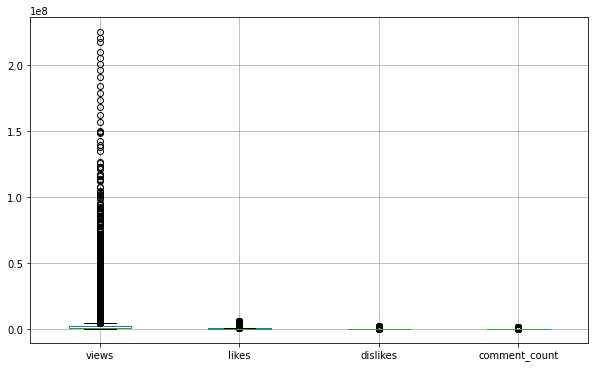

In [162]:
dataset[['views','likes','dislikes','comment_count']].boxplot(figsize = (10, 6))

In [163]:
Q1 =dataset.views.quantile(0.25)
Q3 =dataset.views.quantile(0.75)
Q1,Q3

(241972.0, 1821926.0)

In [164]:
IQR=Q3-Q1
IQR

1579954.0

In [165]:
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM

(-2127959.0, 4191857.0)

In [166]:
dataset=dataset[(dataset.views>LM)&(dataset.views<UM)]

<AxesSubplot:>

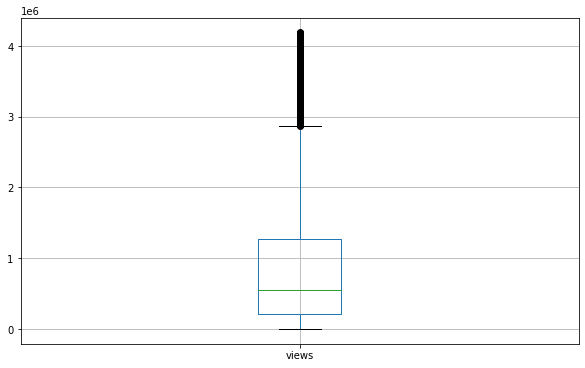

In [167]:
dataset[['views']].boxplot(figsize = (10, 6))

<AxesSubplot:>

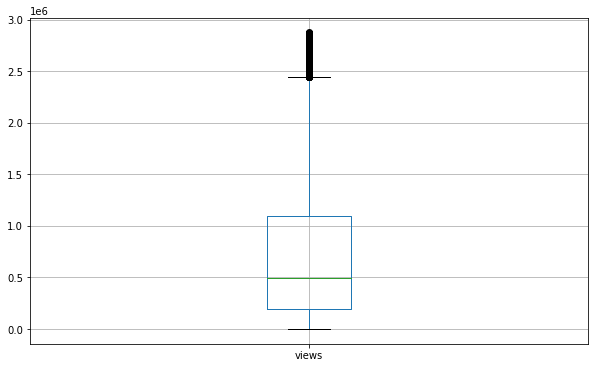

In [168]:
#iternation 2
Q1 =dataset.views.quantile(0.25)
Q3 =dataset.views.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.views>LM)&(dataset.views<UM)]
dataset[['views']].boxplot(figsize = (10, 6))

<AxesSubplot:>

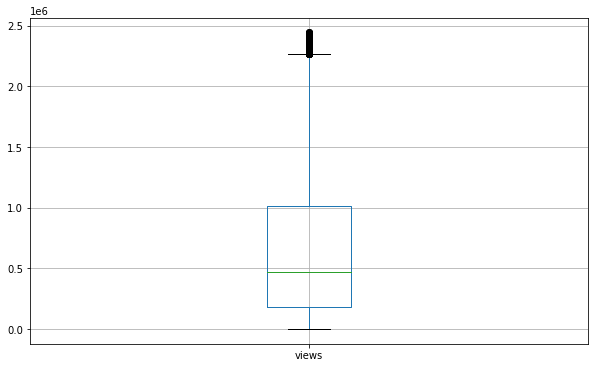

In [169]:
#iternation 3
Q1 =dataset.views.quantile(0.25)
Q3 =dataset.views.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.views>LM)&(dataset.views<UM)]
dataset[['views']].boxplot(figsize = (10, 6))

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40932,tiF9SzzzX_o,18.14.06,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,24,2018-05-22T02:34:39.000Z,"the voice season 14|""the voice finale performa...",1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False
40933,Gs26bZTRkdU,18.14.06,8 Survival Myths That Will Definitely Make Thi...,SciShow,27,2018-05-20T21:00:00.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",979732,29038,1121,2584,https://i.ytimg.com/vi/Gs26bZTRkdU/default.jpg,False,False,False
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False


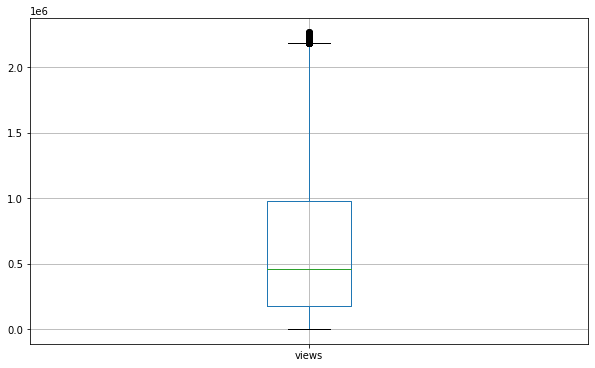

In [170]:
#iternation 4
Q1 =dataset.views.quantile(0.25)
Q3 =dataset.views.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.views>LM)&(dataset.views<UM)]
dataset[['views']].boxplot(figsize = (10, 6))
dataset

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40932,tiF9SzzzX_o,18.14.06,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,24,2018-05-22T02:34:39.000Z,"the voice season 14|""the voice finale performa...",1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False
40933,Gs26bZTRkdU,18.14.06,8 Survival Myths That Will Definitely Make Thi...,SciShow,27,2018-05-20T21:00:00.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",979732,29038,1121,2584,https://i.ytimg.com/vi/Gs26bZTRkdU/default.jpg,False,False,False
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False


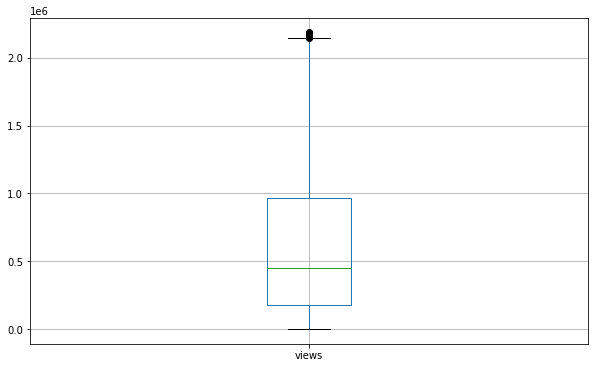

In [171]:
#iternation 5
Q1 =dataset.views.quantile(0.25)
Q3 =dataset.views.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.views>LM)&(dataset.views<UM)]
dataset[['views']].boxplot(figsize = (10, 6))
dataset

(29816, 15)

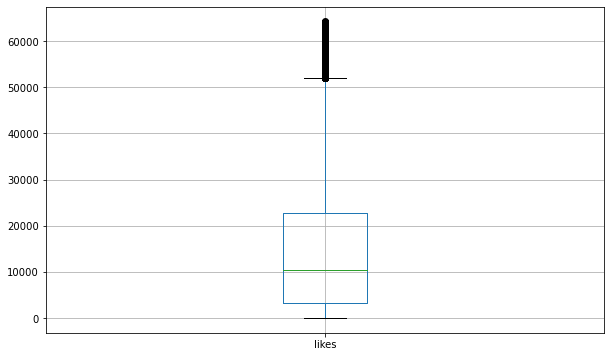

In [172]:
#iternation 1 -- likes
Q1 =dataset.likes.quantile(0.25)
Q3 =dataset.likes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.likes>LM)&(dataset.likes<UM)]
dataset[['likes']].boxplot(figsize = (10, 6))
dataset.shape

(28645, 15)

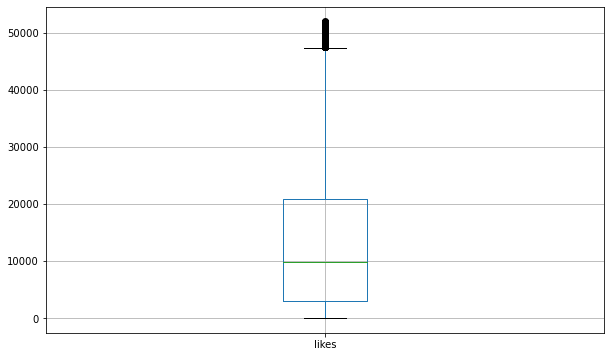

In [173]:
#iternation 2 -- likes
Q1 =dataset.likes.quantile(0.25)
Q3 =dataset.likes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.likes>LM)&(dataset.likes<UM)]
dataset[['likes']].boxplot(figsize = (10, 6))
dataset.shape

(28059, 15)

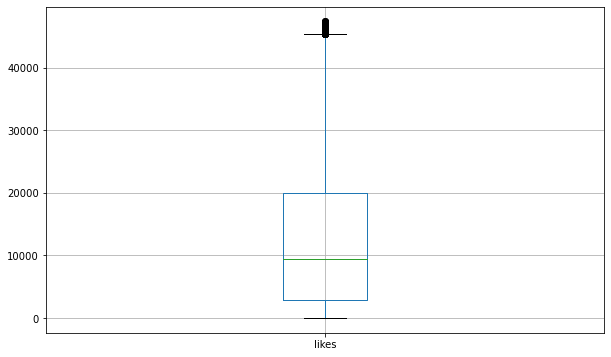

In [174]:
#iternation 3 -- likes
Q1 =dataset.likes.quantile(0.25)
Q3 =dataset.likes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.likes>LM)&(dataset.likes<UM)]
dataset[['likes']].boxplot(figsize = (10, 6))
dataset.shape

(27780, 15)

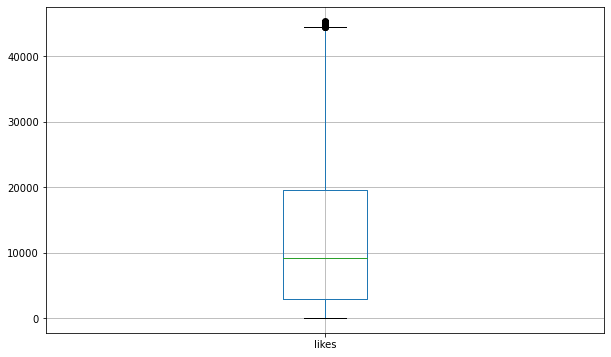

In [175]:
#iternation 4 -- likes
Q1 =dataset.likes.quantile(0.25)
Q3 =dataset.likes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.likes>LM)&(dataset.likes<UM)]
dataset[['likes']].boxplot(figsize = (10, 6))
dataset.shape

(25354, 15)

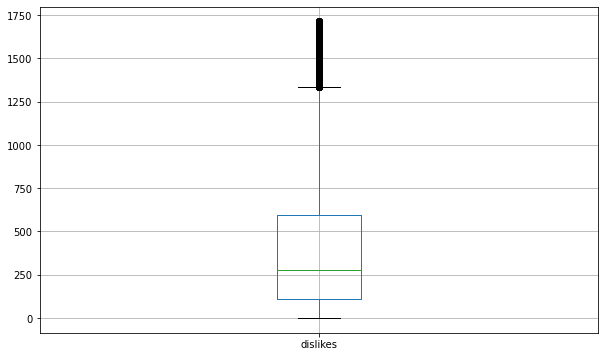

In [176]:
#iternation 1 -- dislikes
Q1 =dataset.dislikes.quantile(0.25)
Q3 =dataset.dislikes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.dislikes>LM)&(dataset.dislikes<UM)]
dataset[['dislikes']].boxplot(figsize = (10, 6))
dataset.shape

(24275, 15)

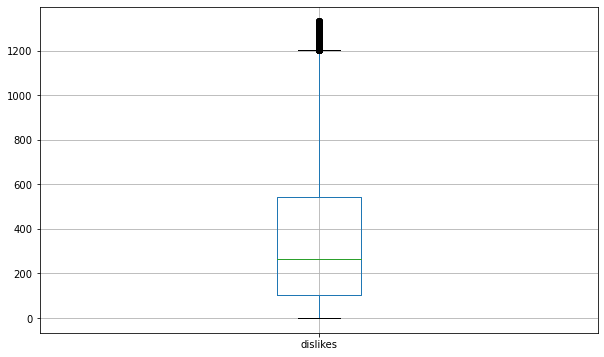

In [177]:
#iternation 2 -- dislikes
Q1 =dataset.dislikes.quantile(0.25)
Q3 =dataset.dislikes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.dislikes>LM)&(dataset.dislikes<UM)]
dataset[['dislikes']].boxplot(figsize = (10, 6))
dataset.shape

(23749, 15)

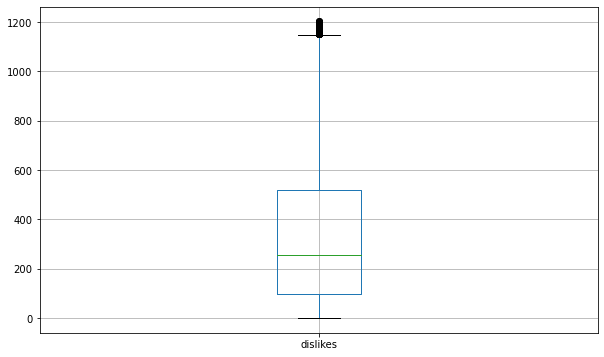

In [178]:
#iternation 3 -- dislikes
Q1 =dataset.dislikes.quantile(0.25)
Q3 =dataset.dislikes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.dislikes>LM)&(dataset.dislikes<UM)]
dataset[['dislikes']].boxplot(figsize = (10, 6))
dataset.shape

(23503, 15)

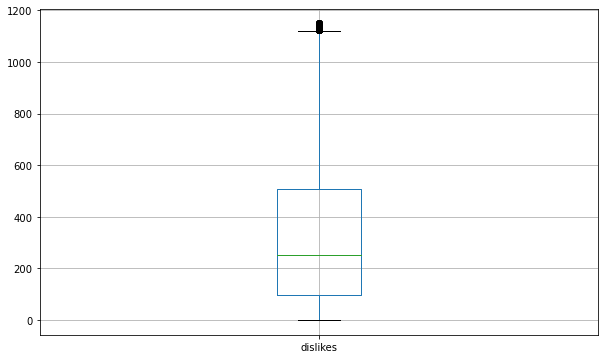

In [179]:
#iternation 4 -- dislikes
Q1 =dataset.dislikes.quantile(0.25)
Q3 =dataset.dislikes.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
dataset=dataset[(dataset.dislikes>LM)&(dataset.dislikes<UM)]
dataset[['dislikes']].boxplot(figsize = (10, 6))
dataset.shape

(22048, 15)

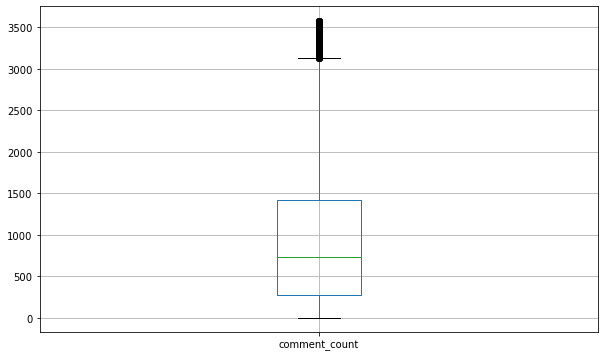

In [180]:
#iternation 1 -- comment_count
Q1 =dataset.comment_count.quantile(0.25)
Q3 =dataset.comment_count.quantile(0.75)
Q1,Q3

IQR=Q3-Q1
IQR

LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM

dataset=dataset[(dataset.comment_count>LM)&(dataset.comment_count<UM)]
dataset[['comment_count']].boxplot(figsize = (10, 6))
dataset.shape

(21625, 15)

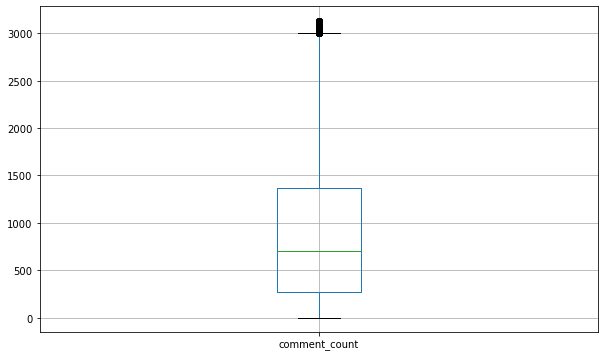

In [181]:
#iternation 2 -- comment_count
Q1 =dataset.comment_count.quantile(0.25)
Q3 =dataset.comment_count.quantile(0.75)
Q1,Q3

IQR=Q3-Q1
IQR

LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM

dataset=dataset[(dataset.comment_count>LM)&(dataset.comment_count<UM)]
dataset[['comment_count']].boxplot(figsize = (10, 6))
dataset.shape

(21488, 15)

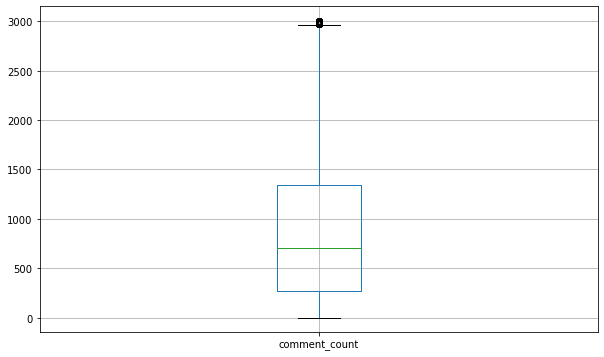

In [182]:
#iternation 3 -- comment_count
Q1 =dataset.comment_count.quantile(0.25)
Q3 =dataset.comment_count.quantile(0.75)
Q1,Q3

IQR=Q3-Q1
IQR

LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM

dataset=dataset[(dataset.comment_count>LM)&(dataset.comment_count<UM)]
dataset[['comment_count']].boxplot(figsize = (10, 6))
dataset.shape

(20169, 15)

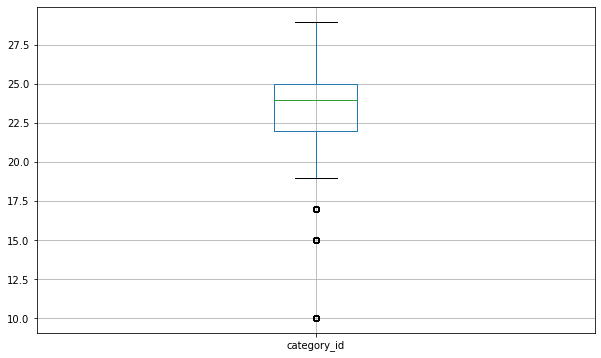

In [183]:
#iternation 1 -- category_id
Q1 =dataset.category_id.quantile(0.25)
Q3 =dataset.category_id.quantile(0.75)
Q1,Q3

IQR=Q3-Q1
IQR

LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM

dataset=dataset[(dataset.category_id>LM)&(dataset.category_id<UM)]
dataset[['category_id']].boxplot(figsize = (10, 6))
dataset.shape

In [184]:
#iternation 2 -- category_id
#Q1 =dataset.category_id.quantile(0.25)
#Q3 =dataset.category_id.quantile(0.75)
#Q1,Q3

#IQR=Q3-Q1
#IQR

#LM =Q1 - 1.5*IQR
#UM =Q3 + 1.5*IQR
#LM,UM

#dataset=dataset[(dataset.category_id>LM)&(dataset.category_id<UM)]
#dataset[['category_id']].boxplot(figsize = (10, 6))
#dataset.shape

In [185]:
#iternation 3 -- category_id
#Q1 =dataset.category_id.quantile(0.25)
#Q3 =dataset.category_id.quantile(0.75)
#Q1,Q3

#IQR=Q3-Q1
#IQR

#LM =Q1 - 1.5*IQR
#UM =Q3 + 1.5*IQR
##LM,UM

#dataset=dataset[(dataset.category_id>LM)&(dataset.category_id<UM)]
#dataset[['category_id']].boxplot(figsize = (10, 6))
#dataset.shape

In [186]:
dataset.to_csv("preprocessed.csv", sep=',', index=False)